In [ ]:
path_KAN = "polys_KAN.dill"
path_NN  ="polys_NN.dill"


In [ ]:
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
import Kan_NN
import importlib
importlib.reload(Kan_NN)


<module 'Kan_NN' from 'C:\\Users\\JP\\Documents\\TU Berlin\\Master\\Code_RNN\\Kan\\Misc\\Kan_NN.py'>

In [3]:
in_dim = 12
degree = 2

In [4]:
import torch
import itertools

class RandomPolynomial(torch.nn.Module):
    def __init__(self, input_dim, degree):
        super(RandomPolynomial, self).__init__()
        self.input_dim = input_dim
        self.degree = degree
        self.exponents = self.generate_exponents(degree, input_dim)
        torch.manual_seed(42)
        self.coefficients = torch.randn(len(self.exponents))
        print(self.exponents)
        print(self.coefficients)

    def forward(self, X):
        batch_size = X.shape[0]
        result = torch.zeros(batch_size, 1)

        # For each monomial (term) in the polynomial, compute the corresponding product of powers of X
        for idx, exp in enumerate(self.exponents):
            term = torch.ones(batch_size, 1)
            for dim, e in enumerate(exp):
                term *= X[:, dim].pow(e).view(-1, 1)
            result += self.coefficients[idx] * term
        return result

    def generate_exponents(self, degree, input_dim):
        exponents = []
        for exp_tuple in itertools.product(range(degree + 1), repeat=input_dim):
            if sum(exp_tuple) <= degree:
                exponents.append(exp_tuple)
        return exponents
    
poly = RandomPolynomial(input_dim=in_dim, degree=degree)


[(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1), (0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0), (0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1), (0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0), (0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0), (0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0), (0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0), (0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0), (0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0), (0, 0, 0, 0

In [ ]:
import dill
with open(path_NN, "rb") as f:
    models_NN = dill.load(f)

with open(path_kan, "rb") as f:
    models_KAN = dill.load(f)

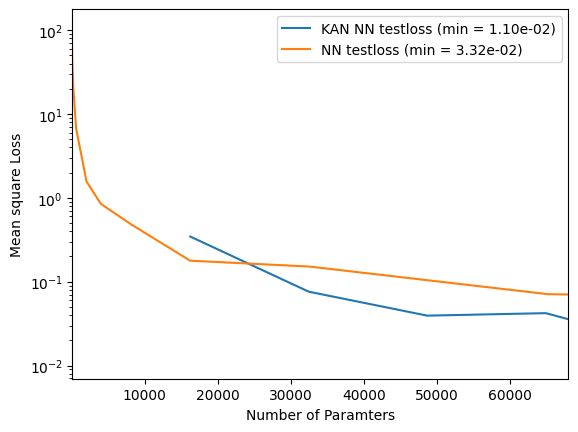

In [ ]:
import matplotlib.pyplot as plt
criterion = torch.nn.MSELoss(reduction='mean')
samples = 15000
max_depth = 1
for i in range(1,max_depth):
    plot_x =[]
    plot_y = []
    plot_x_NN =[]
    plot_y_NN = []
    input = torch.randn(samples, in_dim)
    for model in models_NN[i - 1]:
        target = poly(input)
        model.eval()
        outputs = model(input)
        loss = criterion(target, outputs)
        plot_x_NN.append(model.params)
        plot_y_NN.append(loss.detach())
 
                  
    for model in models_KAN[i-1]:
        plot_x.append(model.params)
        target = poly(input)
        model.eval()
        outputs = model(input)
        loss = criterion(target, outputs)
        plot_y.append(loss.detach())

    plt.xlabel("Number of Paramters")
    plt.ylabel("Mean square Loss")
    plt.title(rf"Parameter Efficiency of KAN NN (Univariate Depth = {i}) vs. NN (depth={len(shape) + (len(shape)-1)*i}) in Approximating Polynomial $p \in P_2[I^4]$ ")
    plt.plot(plot_x, plot_y, label= f"KAN NN testloss (min = {min(plot_y):.2e})")
    plt.plot(plot_x_NN, plot_y_NN, label= f"NN testloss (min = {min(plot_y_NN):.2e})")
    plt.xlim([100, 68000])
    #plt.xscale("log")
    plt.yscale("log")
    plt.legend()
    plt.show()